# Exploratory Data Analysis (EDA) for Financial Transactions

In this notebook, I conduct an EDA for Financial Transaction project. <br>
The goal of this analysis is to understand the dataset's structure, identify patterns, and uncover insights that will inform subsequent modeling efforts.

**Author:** Andrés Felipe Echeverri Giraldo (akatowolf@hotmail.com) <br>
**Date:** 2024-08-29 <br>
**Notebook Version:** 1.0 <br>
**Python Version:** 3.11.7 <br>
**Libraries:** pandas, numpy, matplotlib, seaborn <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import entropy
import sys

sys.path.insert(0, '../src')
import eda_utils

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', 100)

#### Loading and describing dataset

In [3]:
# Load the diabetes dataset
financial = pd.read_parquet('../data/raw/bank_transactions.parquet')
# First data approach
print("Financial dataset")
print(financial.head().to_string())
print("The shape of financial dataset is: ",financial.shape)

Financial dataset
       account_id       date               transaction_details  chq_no value_date  withdrawal_amt  deposit_amt  balance_amt    category          city   device
0  '409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES     NaN 2017-06-29             NaN    1000000.0    1000000.0    Transfer      New York   Tablet
1  '409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES     NaN 2017-07-05             NaN    1000000.0    2000000.0    Transfer       Phoenix   Mobile
2  '409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE     NaN 2017-07-18             NaN     500000.0    2500000.0  Investment        Dallas   Tablet
3  '409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES     NaN 2017-08-01             NaN    3000000.0    5500000.0    Transfer      San Jose  Desktop
4  '409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE     NaN 2017-08-16             NaN     500000.0    6000000.0  Investment  Philadelphia  Desktop
The shape of financial datas

In [4]:
print(financial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   account_id           116201 non-null  object        
 1   date                 116201 non-null  datetime64[ns]
 2   transaction_details  113702 non-null  object        
 3   chq_no               905 non-null     float64       
 4   value_date           116201 non-null  datetime64[ns]
 5   withdrawal_amt       53549 non-null   float64       
 6   deposit_amt          62652 non-null   float64       
 7   balance_amt          116201 non-null  float64       
 8   category             116201 non-null  object        
 9   city                 116201 non-null  object        
 10  device               116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 9.8+ MB
None


In [5]:
print("Describe numerical features: ")
print(financial.drop(['date','value_date'],axis=1).describe().to_string())
print("\n" * 1)
print("Describe categorical features: ")
print(financial.drop(['date','value_date'],axis=1).describe(exclude=np.number).to_string())
print("\n" * 1)
print("Describe timestamp features: ")
print(financial[['date','value_date']].describe().to_string())

Describe numerical features: 
              chq_no  withdrawal_amt   deposit_amt   balance_amt
count     905.000000    5.354900e+04  6.265200e+04  1.162010e+05
mean   791614.503867    4.489190e+06  3.806586e+06 -1.404852e+09
std    151205.932910    1.084850e+07  8.683093e+06  5.348202e+08
min         1.000000    1.000000e-02  1.000000e-02 -2.045201e+09
25%    704231.000000    3.000000e+03  9.900000e+04 -1.690383e+09
50%    873812.000000    4.708300e+04  4.265000e+05 -1.661395e+09
75%    874167.000000    5.000000e+06  4.746411e+06 -1.236888e+09
max    874525.000000    4.594475e+08  5.448000e+08  8.500000e+06


Describe categorical features: 
       account_id         transaction_details       category     city  device
count      116201                      113702         116201   116201  116201
unique         10                       44806             18       10       3
top     '1196428'  FDRL/INTERNAL FUND TRANSFE  Miscellaneous  Phoenix  Tablet
freq        48779                      

* The dataframe contains 5 categorical features, 2 timestamp and 4 numerical
* The "transaction_details" feature has too many categories, so a handling strategy is required
* Transactions ocurred between 2015 and 2019

In [6]:
print("Number of duplicated rows: ",financial.duplicated().sum())
print("Transactions per account: ",financial['account_id'].value_counts())

Number of duplicated rows:  3
Transactions per account:  account_id
'1196428'         48779
'409000362497'    29840
'409000438620'    13454
'1196711'         10536
'409000493210'     6014
'409000438611'     4588
'409000611074'     1093
'409000493201'     1044
'409000425051'      802
'409000405747'       51
Name: count, dtype: int64


* There are 3 duplicated rows
* All transactions come from the same 10 accounts
* The number of transactions per account are not well distributed

In [7]:
missing = financial.isna().sum()[financial.isna().sum() > 0]
print("Number of missing values per feature: \n",missing)
print("\n" * 1)
#print("Number of missing values when missing == ? \n", {col: (financial[col] == '?').sum() for col in diabetes.columns if (diabetes[col] == '?').sum() > 0})
#print("\n" * 1)
for column in missing.index:
    print(financial[column].value_counts())

Number of missing values per feature: 
 transaction_details      2499
chq_no                 115296
withdrawal_amt          62652
deposit_amt             53549
dtype: int64


transaction_details
FDRL/INTERNAL FUND TRANSFE          8839
FDRL/NATIONAL ELECTRONIC F          6262
INTERNAL FUND TRANSFER IN           3262
TRF TO  Indiaforensic SERVICES I    3082
TRF FROM  Indiaforensic SERVICES    2107
                                    ... 
RTGS/YESBH15280015242/Indfor           1
RTGS/ICICH15280016715/Indfor           1
RTGS/ICICH15280016720/Indfor           1
INDER PRAKASH SARID                    1
IMPS 05-03-20194C                      1
Name: count, Length: 44806, dtype: int64
chq_no
5.0         3
4.0         3
3.0         3
2.0         3
1.0         2
           ..
874128.0    1
873873.0    1
874045.0    1
874046.0    1
704388.0    1
Name: count, Length: 894, dtype: int64
withdrawal_amt
15000000.00    4491
10000000.00    2497
5000000.00     1332
1000.00        1292
500.00         127

* There is a significant amount of null values
* The 'chq_no' feature has the highest number of missing values. While it is valuable for tracking, a better approach for modeling could be to transform it into a binary feature indicating 'Yes' or 'No'
* 'withdrawal_amt' and 'deposit_amt' are complementary features. To avoid missing values, one approach could be to combine them into a single feature and add a binary 'Yes' or 'No' feature to indicate the type of a transaction.

In [8]:
# Categorical and numerical variables based on metada
numerical = list(financial.select_dtypes(include=['number']).columns)
categorical = list(financial.select_dtypes(include=['object']).columns)
timestamps =  list(financial.select_dtypes(include=['datetime']).columns)
print("Categorical variables: ", categorical)
print("Numerical variables: ", numerical)
print("datetime variables: ", timestamps)

Categorical variables:  ['account_id', 'transaction_details', 'category', 'city', 'device']
Numerical variables:  ['chq_no', 'withdrawal_amt', 'deposit_amt', 'balance_amt']
datetime variables:  ['date', 'value_date']


In [9]:
# Validate if 'withdrawal_amt', 'deposit_amt' are really complementary
validation = financial[(financial['withdrawal_amt'].notnull()) & (financial['deposit_amt'].notnull())]
print("Number of transactions where both occur at the same time: ", validation)

Number of transactions where both occur at the same time:  Empty DataFrame
Columns: [account_id, date, transaction_details, chq_no, value_date, withdrawal_amt, deposit_amt, balance_amt, category, city, device]
Index: []


* The features are indeed complementary

In [10]:
# Combining 'withdrawal_amt' and 'deposit_amt'
financial['Transaction_amt'] = financial['withdrawal_amt'].fillna(0) + financial['deposit_amt'].fillna(0)
financial['transaction_type'] = np.where(
    financial['withdrawal_amt'].notnull(), 
    'Withdrawal',
    np.where(financial['deposit_amt'].notnull(), 'Deposit', 'None')
)
print(financial['transaction_type'].value_counts())
numerical.append("Transaction_amt")

transaction_type
Deposit       62652
Withdrawal    53549
Name: count, dtype: int64


#### Ploting distributions of numerical features

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


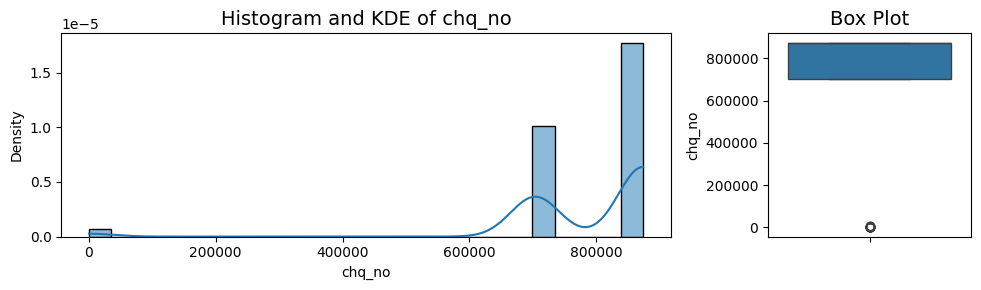

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


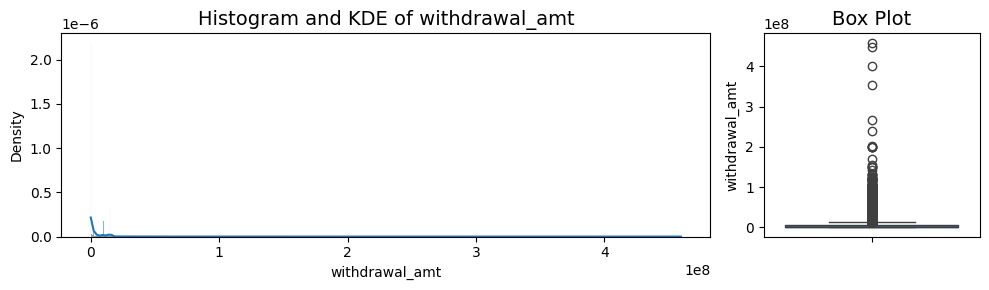

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


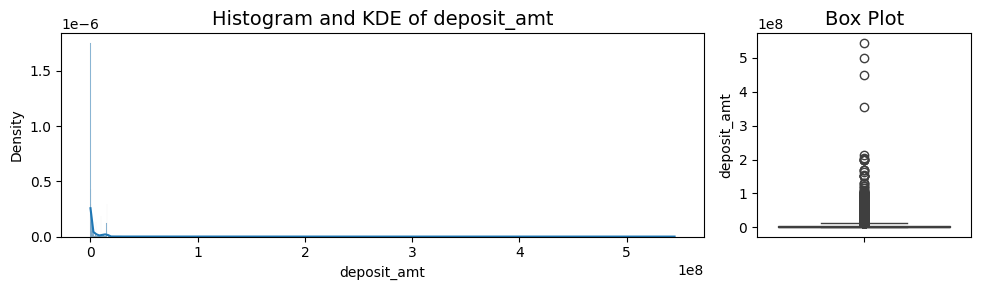

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


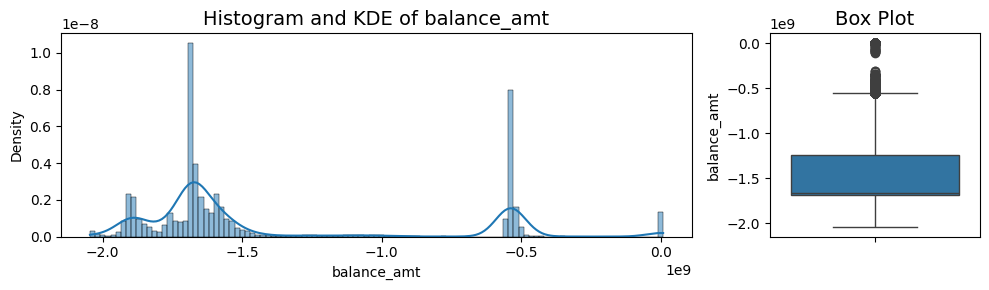

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


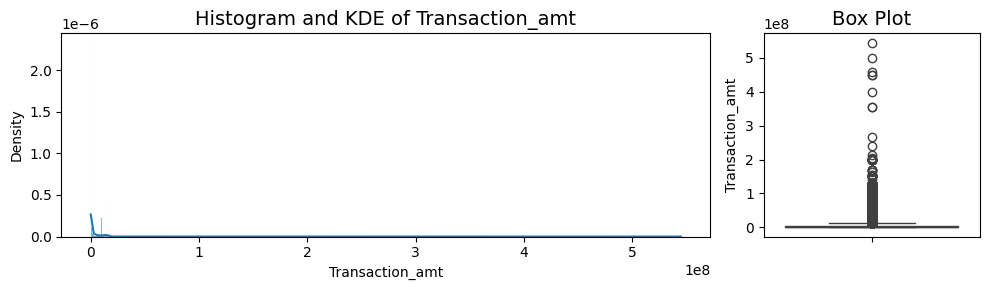

In [11]:
figsize = (10,3)
for column in numerical:
    eda_utils.histplot_with_boxplot(financial, column, None, figsize)

* Important number of outliers in some variables.

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


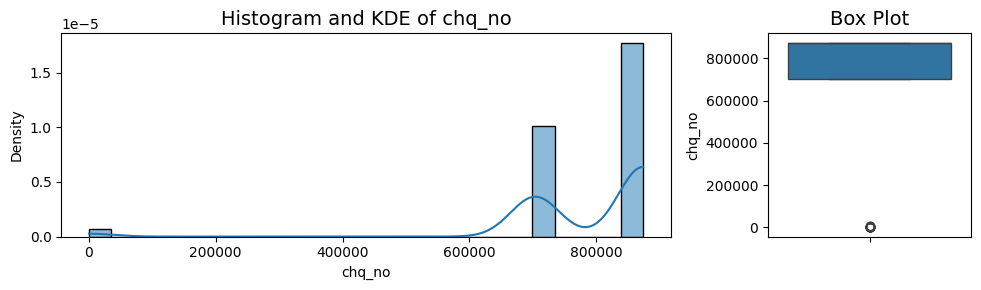

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


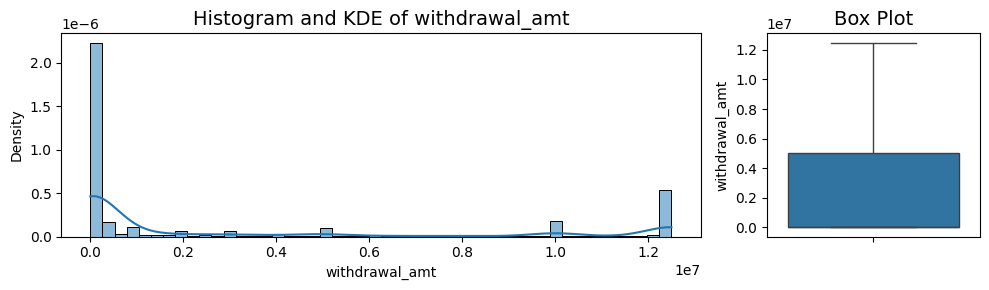

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


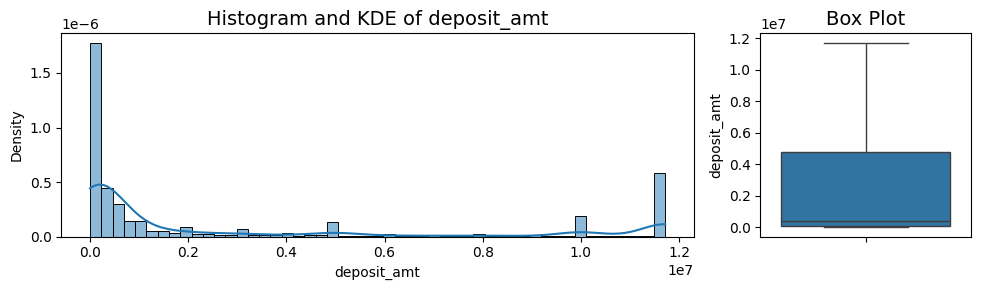

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


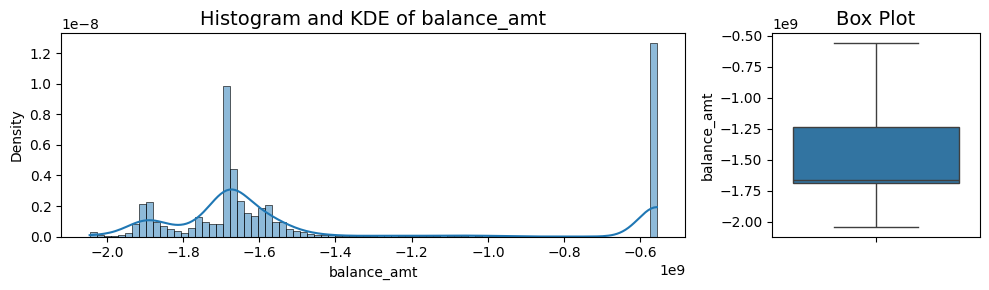

c:\Users\USUARIO\Documents\cursos\meli-financial\meli-venv\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


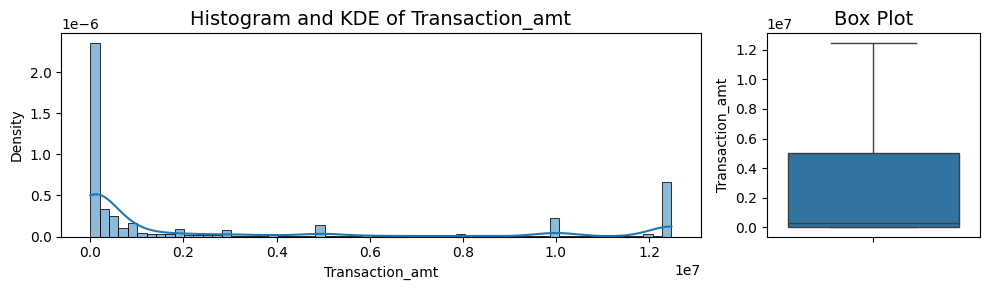

In [12]:
# Cliping outliers to improve visualization of distribution
def clip_upper(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    df[column_name] = df[column_name].clip(upper=upper_limit)
    figsize = (10,3)
    eda_utils.histplot_with_boxplot(df, column_name, None, figsize=figsize)
for column in numerical:
    clip_upper(financial, column)

#### Ploting distributions of categorical features

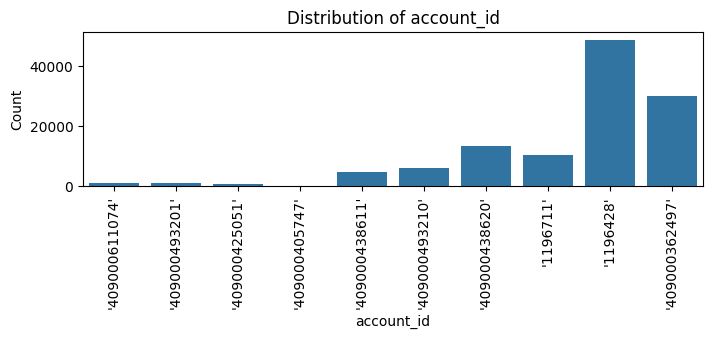

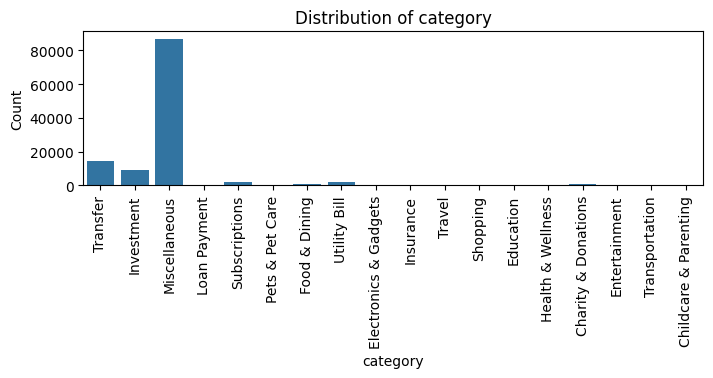

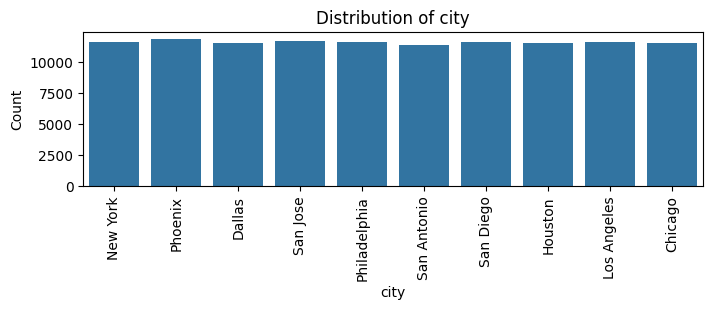

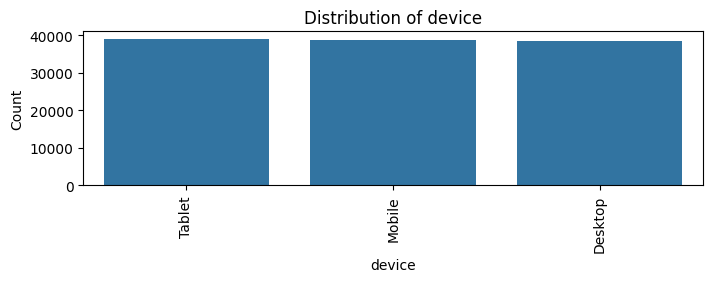

In [13]:
figsize = (8,2)
for column in [col for col in categorical if col != 'transaction_details']:
    eda_utils.barplot(financial, column, None, figsize)

In [14]:
financial.columns

Index(['account_id', 'date', 'transaction_details', 'chq_no', 'value_date',
       'withdrawal_amt', 'deposit_amt', 'balance_amt', 'category', 'city',
       'device', 'Transaction_amt', 'transaction_type'],
      dtype='object')

#### Time series approach

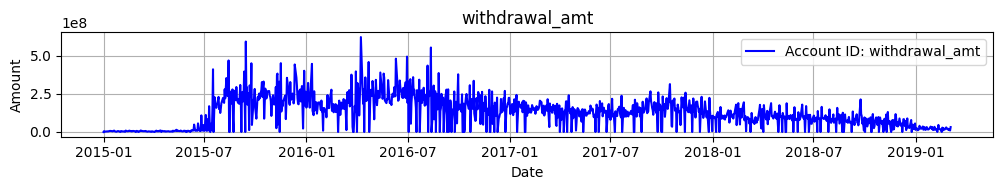

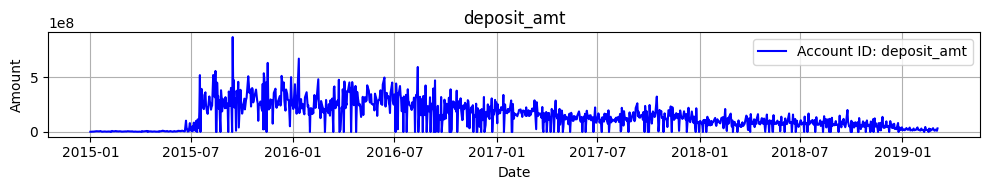

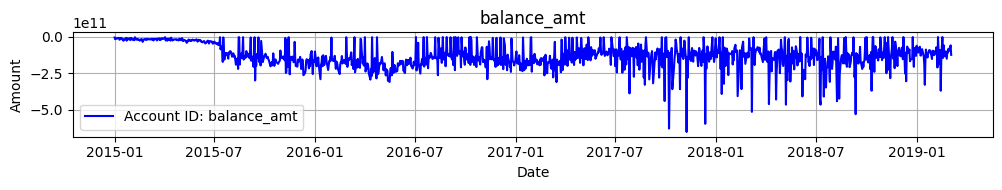

In [15]:
for column in ['withdrawal_amt','deposit_amt','balance_amt']:
    aggregated_data = financial.groupby('date')[column].sum().reset_index()
    figsize = (10,2)
    eda_utils.plot_time_series(aggregated_data, 'date', column, account_id=column, figsize=figsize)

* One possible approach is to use time-based forecasting methods.

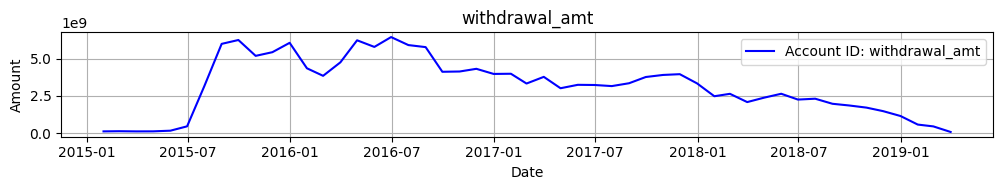

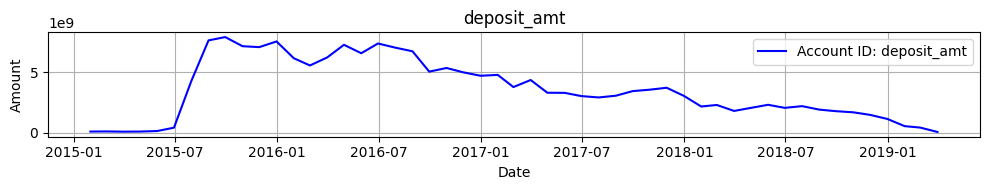

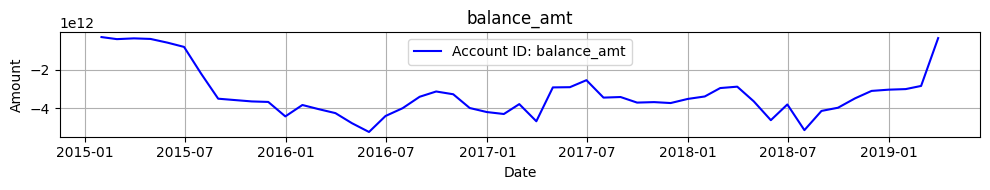

In [16]:
for column in ['withdrawal_amt','deposit_amt','balance_amt']:
    account_data = financial.copy()
    account_data.loc[:, 'date'] = pd.to_datetime(account_data['date'])
    account_data.set_index('date', inplace=True)
    aggregated_data = account_data[column].resample('M').sum().reset_index()
    figsize = (10, 2)
    eda_utils.plot_time_series(aggregated_data, 'date', column, account_id=column, figsize=figsize)

* To improve time series forecasting, we can adjust the window size for aggregating transactions.

##### Transactions per account

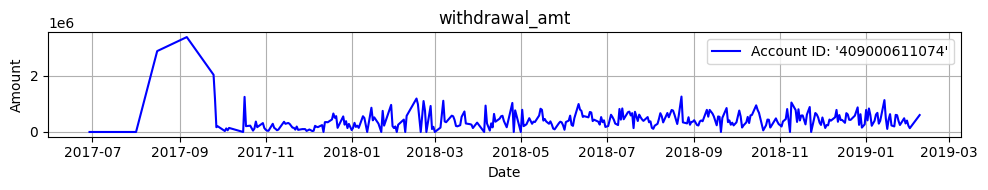

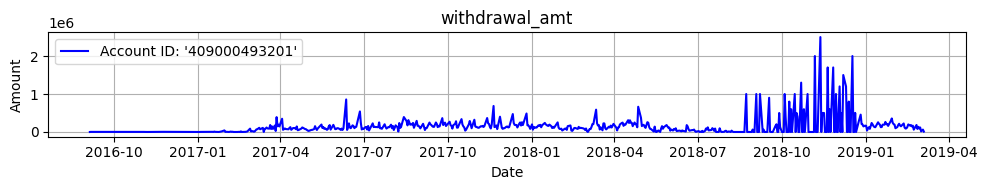

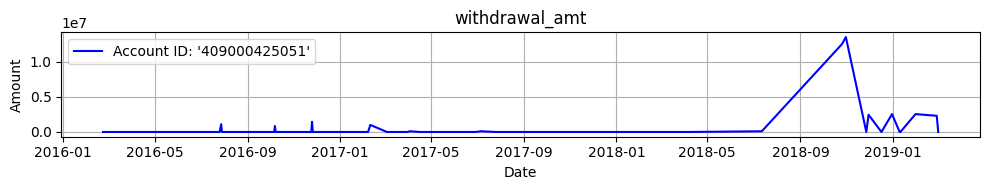

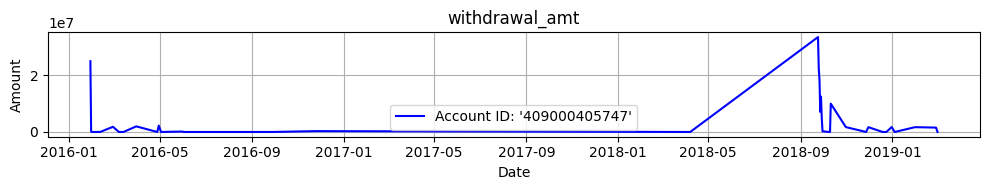

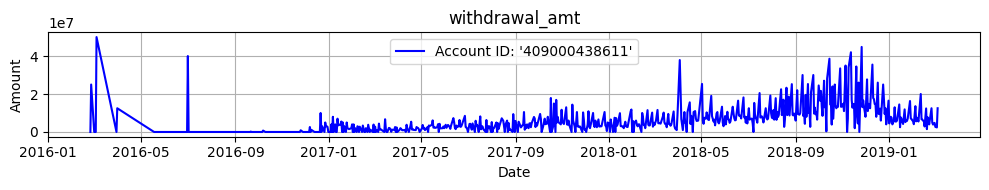

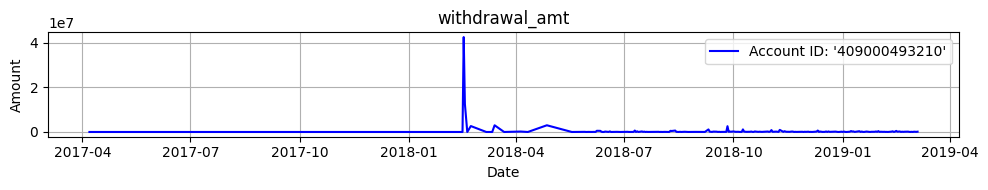

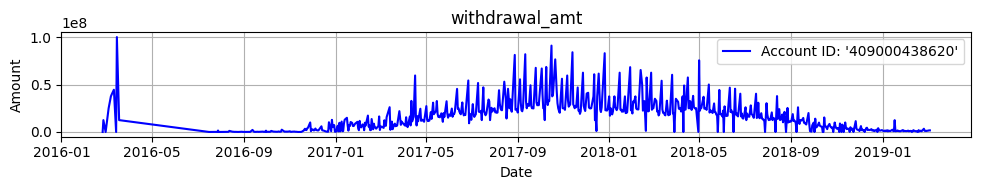

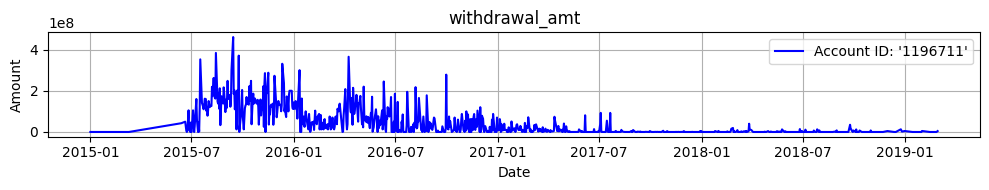

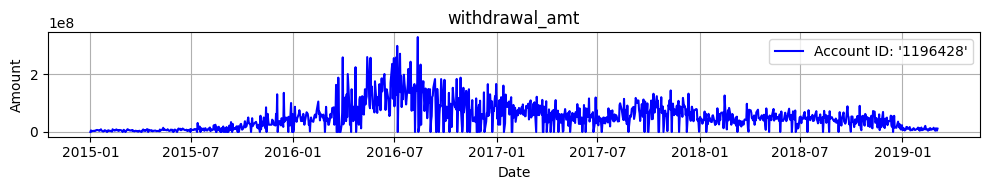

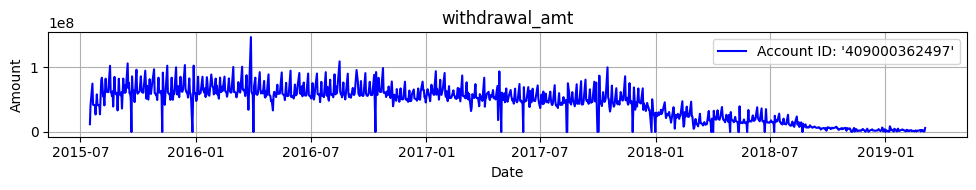

In [17]:
for account in financial['account_id'].unique():
    account_data = financial[financial['account_id'] == account]
    aggregated_data = account_data.groupby('date')['withdrawal_amt'].sum().reset_index()
    figsize = (10,2)
    eda_utils.plot_time_series(aggregated_data, 'date', 'withdrawal_amt', account_id=account, figsize=figsize)

* Some accounts do transactions very spaced out over time, but involve significant amounts of money in short intervals.

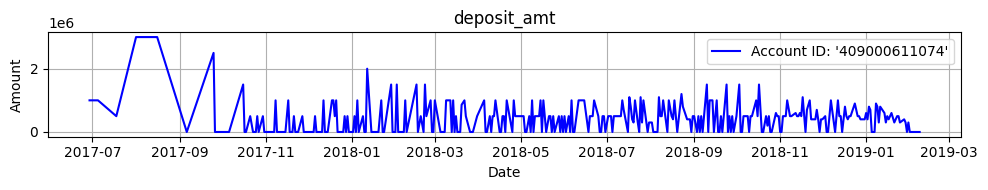

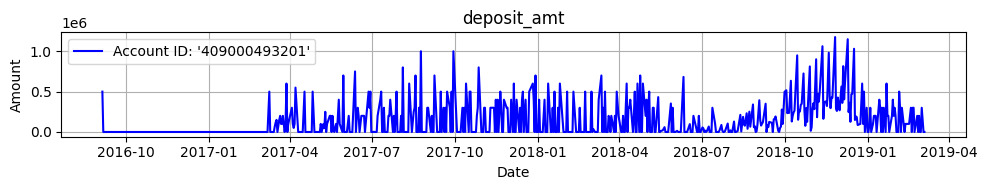

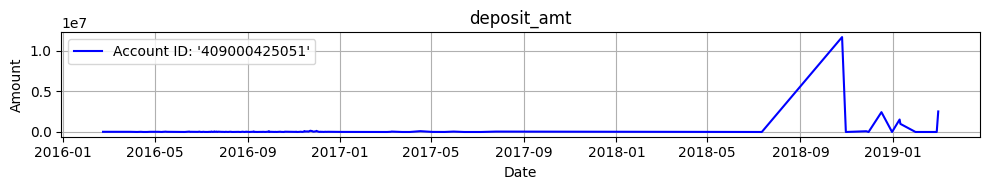

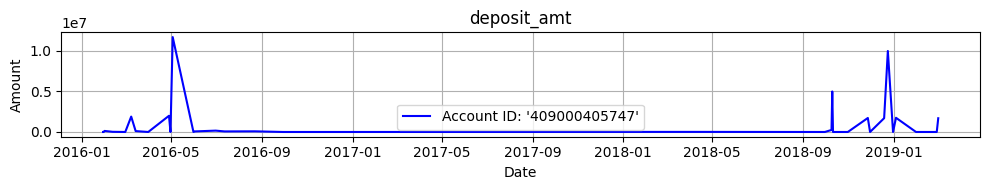

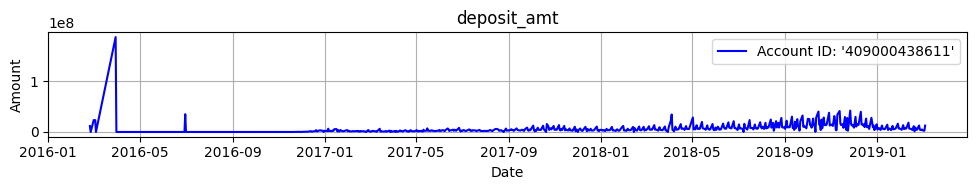

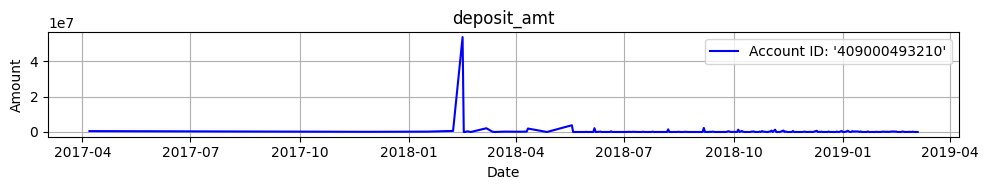

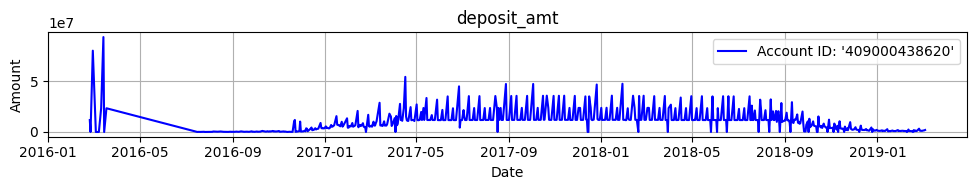

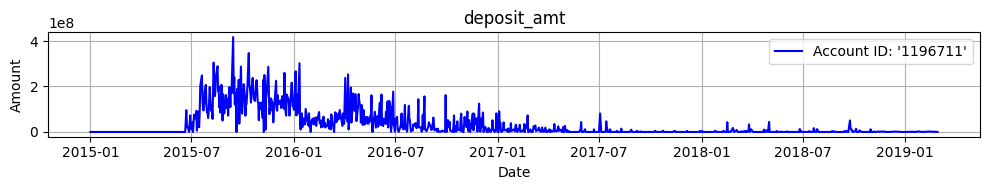

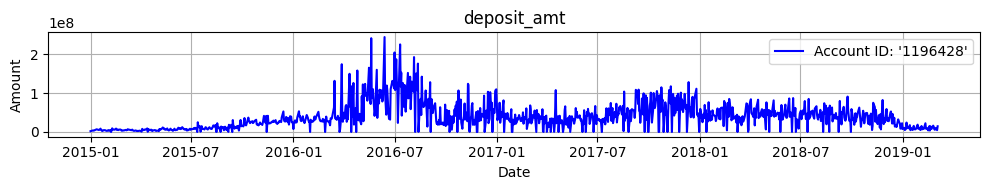

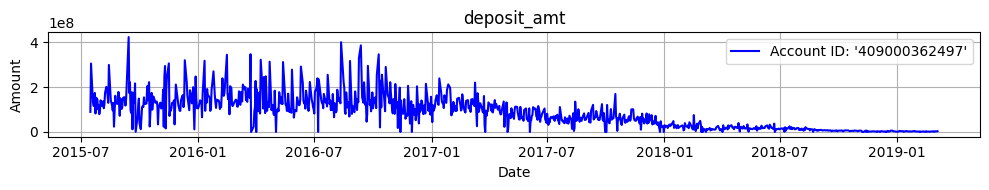

In [18]:
for account in financial['account_id'].unique():
    account_data = financial[financial['account_id'] == account]
    aggregated_data = account_data.groupby('date')['deposit_amt'].sum().reset_index()
    figsize = (10,2)
    eda_utils.plot_time_series(aggregated_data, 'date', 'deposit_amt', account_id=account, figsize=figsize)

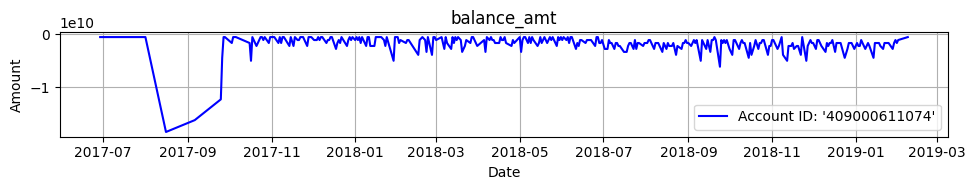

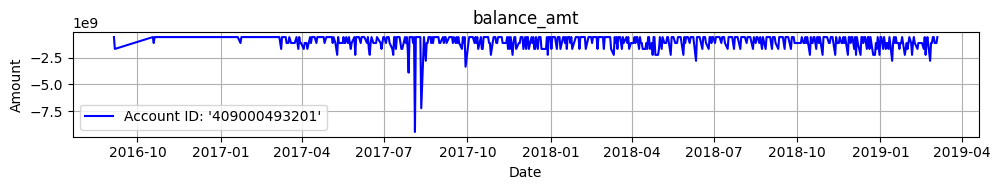

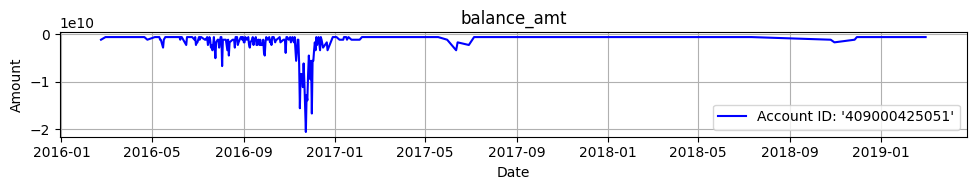

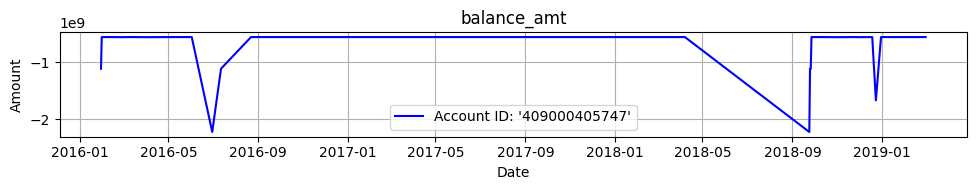

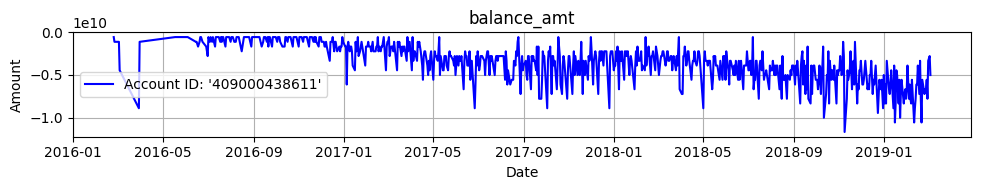

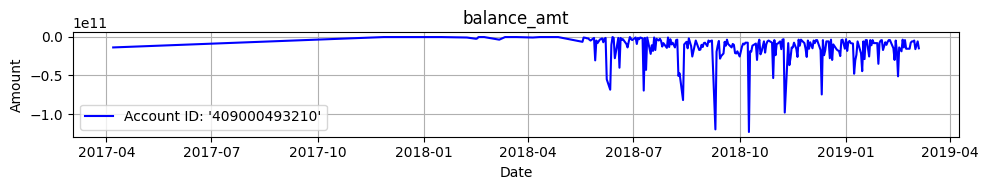

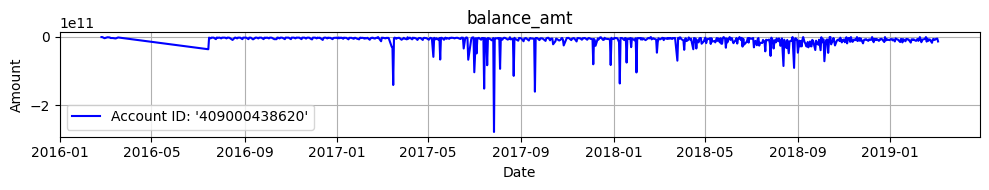

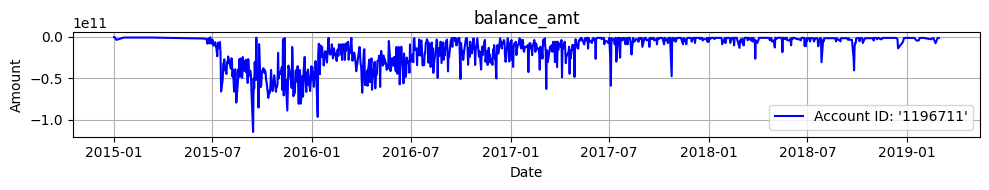

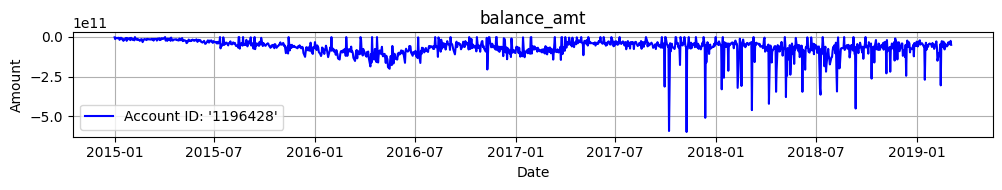

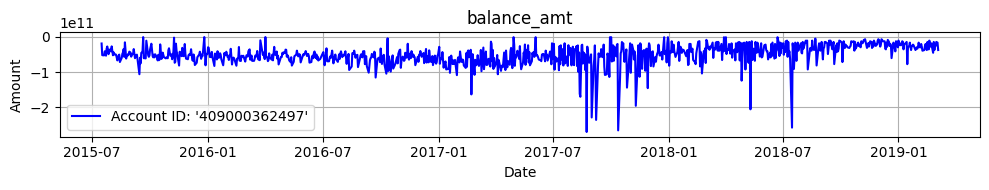

In [19]:
for account in financial['account_id'].unique():
    account_data = financial[financial['account_id'] == account]
    aggregated_data = account_data.groupby('date')['balance_amt'].sum().reset_index()
    figsize = (10,2)
    eda_utils.plot_time_series(aggregated_data, 'date', 'balance_amt', account_id=account, figsize=figsize)

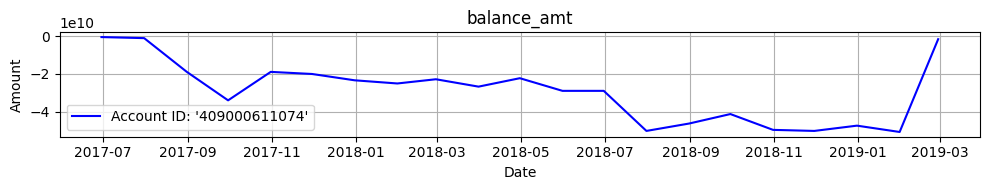

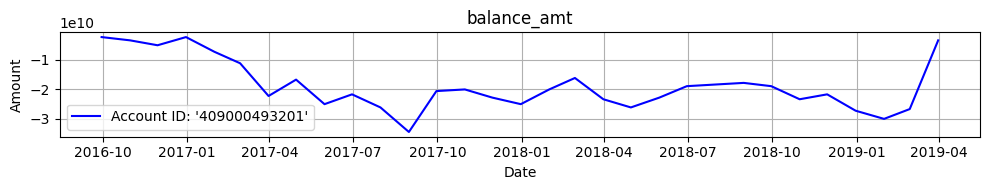

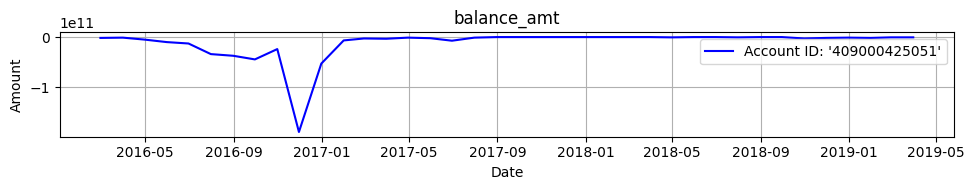

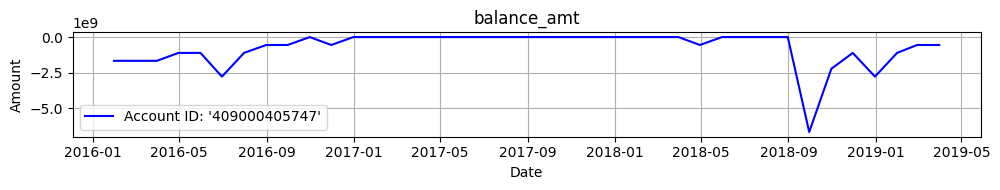

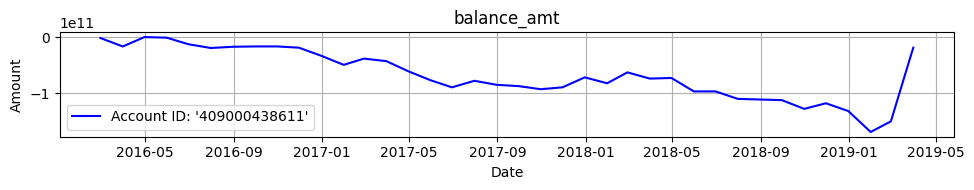

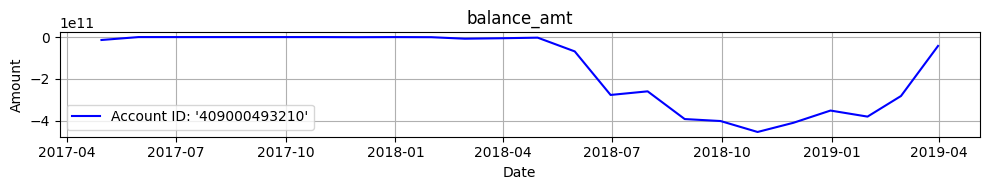

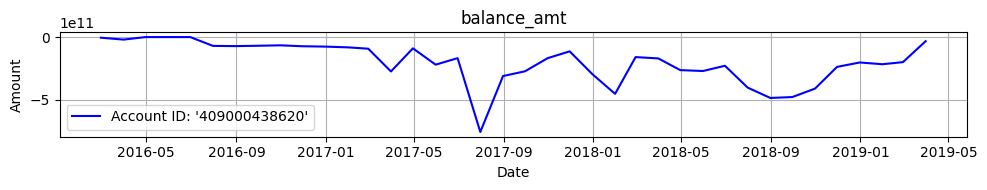

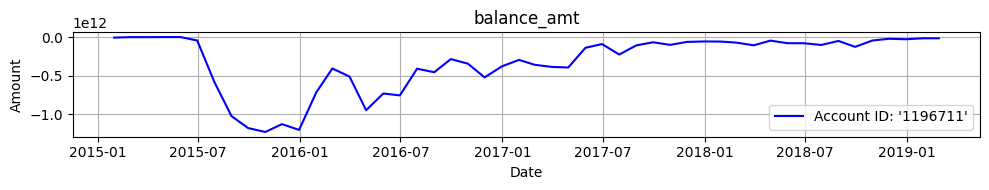

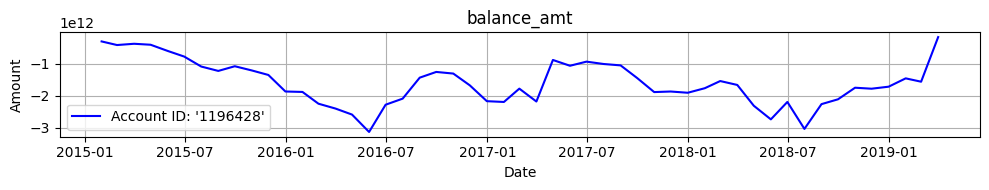

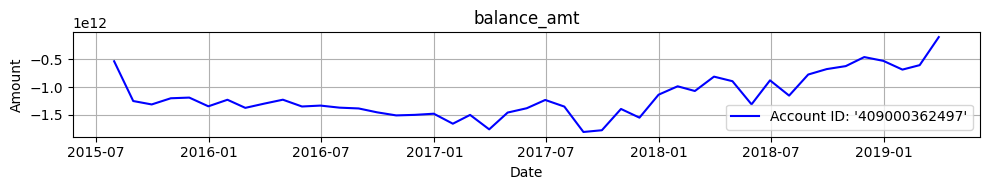

In [20]:
for account in financial['account_id'].unique():
    account_data = financial[financial['account_id'] == account].copy()
    account_data.loc[:, 'date'] = pd.to_datetime(account_data['date'])
    account_data.set_index('date', inplace=True)
    aggregated_data = account_data['balance_amt'].resample('M').sum().reset_index()
    figsize = (10, 2)
    eda_utils.plot_time_series(aggregated_data, 'date', 'balance_amt', account_id=account, figsize=figsize)

#### Correlation matrix

In [21]:
financial[[col for col in numerical if col != 'chq_no']].fillna(0).corr()

,withdrawal_amt,deposit_amt,balance_amt,Transaction_amt
withdrawal_amt,1.000000,-0.177046,-0.091167,0.631011
deposit_amt,-0.177046,1.000000,-0.132362,0.651410
balance_amt,-0.091167,-0.132362,1.000000,-0.172988
Transaction_amt,0.631011,0.651410,-0.172988,1.000000


#### Distribution of Balance by Categorical Features

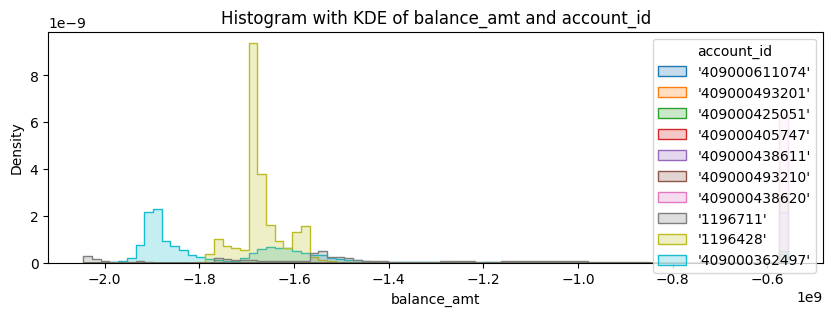

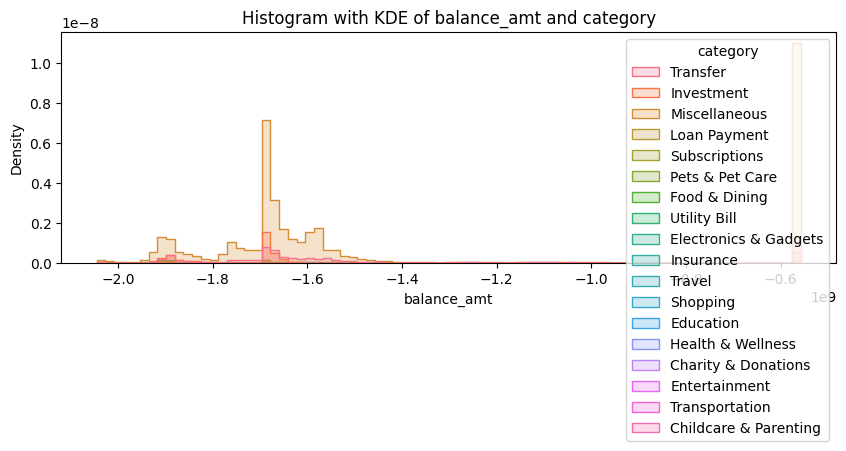

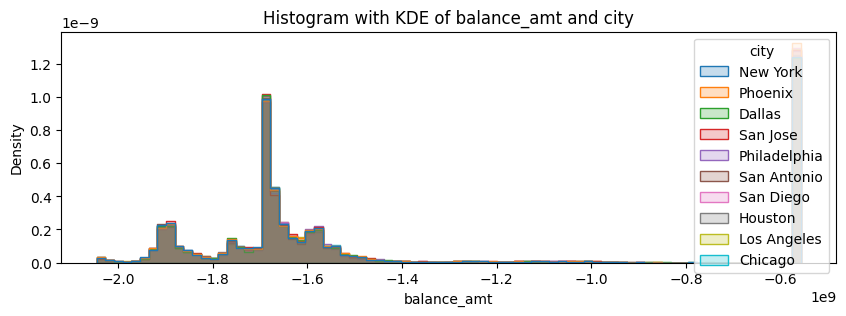

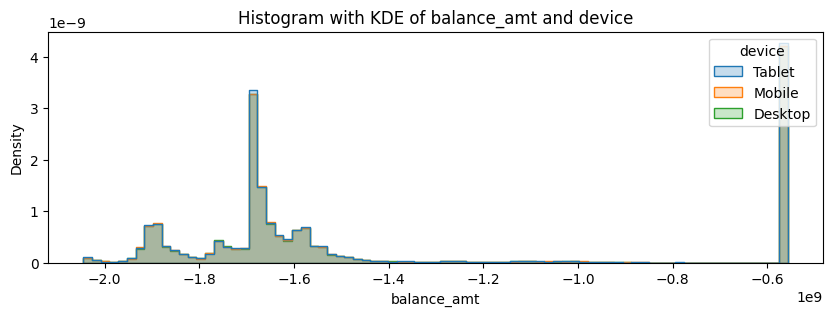

In [32]:
for column in [col for col in categorical if col != 'transaction_details']:
    eda_utils.plot_histogram_with_kde(financial, 'balance_amt', column, figsize=(10, 3))

In [23]:
date_validation = financial.copy()
date_validation['year'] = date_validation['date'].dt.year
date_validation['month'] = date_validation['date'].dt.month
date_validation['day'] = date_validation['date'].dt.day
date_validation['day_of_week'] = date_validation['date'].dt.dayofweek
date_validation['week_of_year'] = date_validation['date'].dt.isocalendar().week
date_validation['is_weekend'] = date_validation['date'].dt.dayofweek >= 5

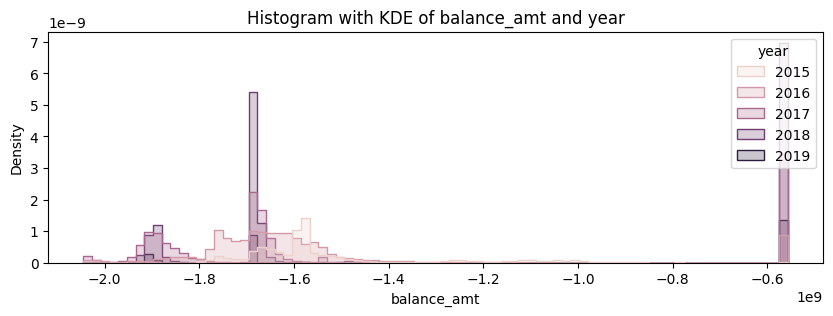

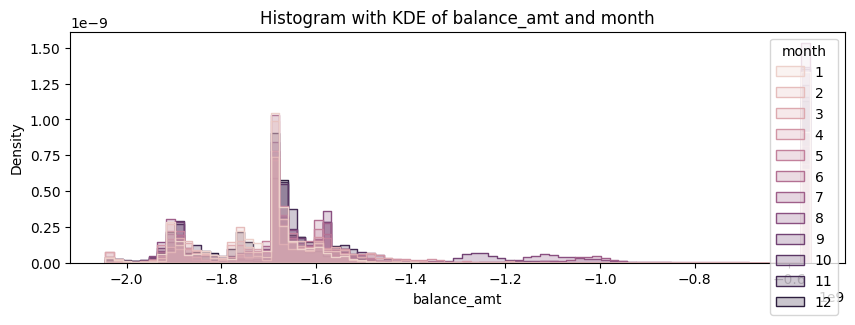

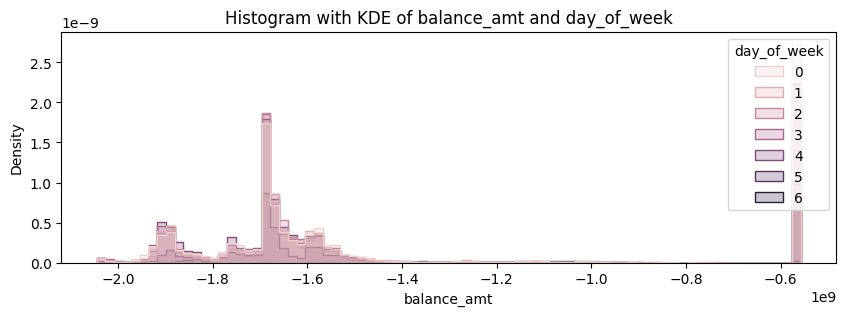

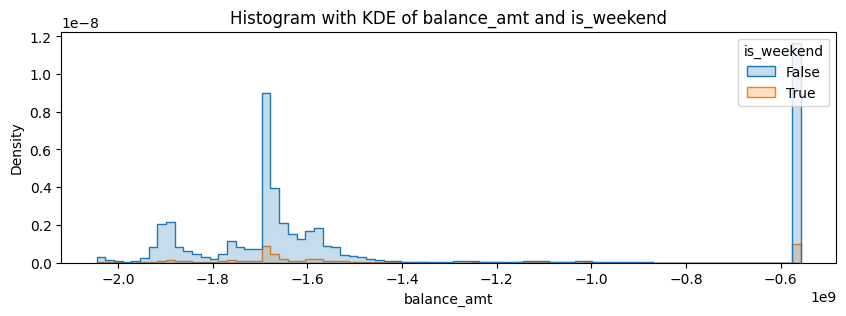

In [24]:
for column in ['year','month','day_of_week','is_weekend']:
    eda_utils.plot_histogram_with_kde(date_validation, 'balance_amt', column, figsize=(10, 3))

In [ ]:

eda_utils.plot_histogram_with_kde(financial, 'balance_amt', 'chq_no', figsize=(10, 3))

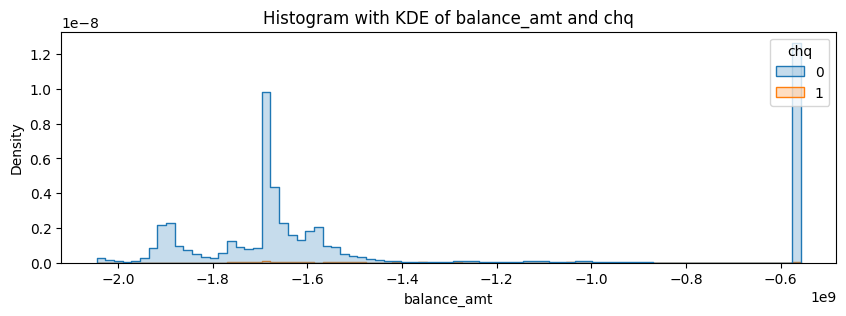

In [31]:
financial['chq'] = np.where(financial['chq_no'].isna(),0,1)
financial['chq'].value_counts()
eda_utils.plot_histogram_with_kde(financial, 'balance_amt', 'chq', figsize=(10, 3))

In [25]:
# Matching dates
dates_are_equal = date_validation['date'] == date_validation['value_date']
matching_proportion = dates_are_equal.mean()
print(matching_proportion * 100)
print(date_validation[date_validation['date'] != date_validation['value_date']][['date','value_date']])

99.88382199808952
             date value_date
27377  2015-07-21 2015-07-20
29942  2015-10-15 2015-10-14
32528  2016-02-22 2016-02-20
34732  2016-08-01 2016-07-31
35175  2016-10-03 2016-09-30
...           ...        ...
110719 2018-02-02 2018-02-01
111776 2018-04-10 2018-04-09
112081 2018-04-27 2018-04-09
113157 2018-06-23 2018-06-22
113687 2018-07-19 2018-07-17

[135 rows x 2 columns]


* 99.9% of transactions are completed on the same day; the difference is negligible.

In [26]:
date_validation.columns

Index(['account_id', 'date', 'transaction_details', 'chq_no', 'value_date',
       'withdrawal_amt', 'deposit_amt', 'balance_amt', 'category', 'city',
       'device', 'Transaction_amt', 'transaction_type', 'year', 'month', 'day',
       'day_of_week', 'week_of_year', 'is_weekend'],
      dtype='object')

In [33]:
financial['category'].value_counts()

category
Miscellaneous            86900
Transfer                 14299
Investment                8898
Subscriptions             2079
Utility Bill              1797
Charity & Donations        738
Food & Dining              505
Loan Payment               344
Electronics & Gadgets      308
Shopping                   208
Pets & Pet Care             47
Travel                      46
Insurance                   16
Transportation               7
Health & Wellness            5
Entertainment                2
Education                    1
Childcare & Parenting        1
Name: count, dtype: int64

In [37]:

financial['total_transfer'] = financial['deposit_amt'].fillna(0) - financial['withdrawal_amt'].fillna(0)
financial['total_transfer'].describe()

count    1.162010e+05
mean     1.708243e+05
std      5.370498e+06
min     -1.249550e+07
25%     -2.682500e+04
50%      5.000000e+03
75%      5.000000e+05
max      1.171753e+07
Name: total_transfer, dtype: float64

# Conclutions

This dataset can be used for various purposes, such as:
* Anomaly detection to identify unusual transactions in accounts
* Time series forecasting to predict bank balances or transactions
* Performing balance prediction per transaction using ML regression algorithms

'Transaction_details' need to be grouped into broader transactions categories. <br>
'chq_no' is a tracking metric and should be transformed to be useful as a predictive feature. <br>
'date', 'withdrawal_amt' and 'deposit_amt' are likely to be good predictive features. <br>
'device' and 'city' distributions don't seem to have significant impact on balance. <br>
Most transactions are completed on the same day, so 'value_date' will not be a predictive feature. <br>
Given the extreme values, it may be necessary to apply a regularization technique.